# Parte 2 - Python

##### Fabián Tovar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1.

### Lectura de los datos del CSV y limpieza en caso de existir irregularidades

In [6]:
df = pd.read_csv('Prueba_Python_practicante.csv', 
                 sep=';',
                 #encoding='utf-8',  # (latin-1, cp1252)
                 na_values=['', ' ', 'NULL', 'null', 'NaN', 'nan', '#N/A', 'N/A'],  # valores nulos
                 keep_default_na=True,  #valores nulos por defecto de pandas
                 dtype={
                     'BPEmp': 'Int64',      # =! int64
                     'Subregion': 'string',
                     'SeccionEconomicaEmp': 'string', 
                     'ClaseEconomica': 'string',
                     'Periodo': 'string',
                     'Cantidad Afiliados': 'Int64'  # =! int64
                 })

text_columns = ['Subregion', 'SeccionEconomicaEmp', 'ClaseEconomica']
for col in text_columns:
    df[col] = df[col].str.strip()

# Verificar valores nulos
print("Verificación de valores nulos:")
print(df.isnull().sum())
print(f"\nTotal de filas: {len(df)}")
print(f"Filas con al menos un valor nulo: {df.isnull().any(axis=1).sum()}")

df['Periodo'] = pd.to_datetime(df['Periodo'], format='%Y%m').dt.to_period('M')

# columnas útiles para análisis temporal
df['Año'] = df['Periodo'].dt.year
df['Mes'] = df['Periodo'].dt.month

print(df.head())
print(df.info())

Verificación de valores nulos:
BPEmp                  0
Subregion              0
SeccionEconomicaEmp    0
ClaseEconomica         0
Periodo                0
Cantidad Afiliados     0
dtype: int64

Total de filas: 47232
Filas con al menos un valor nulo: 0
      BPEmp        Subregion             SeccionEconomicaEmp  \
0  60022321  Valle de Aburra     C_Industrias Manufactureras   
1  70063983  Valle de Aburra   G_Comercio y Rep. Automotores   
2  70079130  Valle de Aburra     C_Industrias Manufactureras   
3  70038481  Valle de Aburra                  F_Construcción   
4  70089227  Valle de Aburra  M_Act. profesionales, cie. tec   

                                      ClaseEconomica  Periodo  \
0           Industrias básicas de hierro y de acero.  2023-10   
1  Comercio al por mayor de materiales de constru...  2023-10   
2  Mantenimiento y reparación especializado de pr...  2023-12   
3   Construcción de otras obras de ingeniería civil.  2023-10   
4          Actividades de administrac

En la celda anterior hice una exploración básica de los datos, tipo de datos, valores nulos y descripción global. Con esto puedo asegurarme de que todo está saliendo bien en el paso de la base de datos de un formato a otro. También me aseguré de que el campo "Periodo" quede con la convención correcta, dado que inicialmente en el archivo .csv no se diferenciaba entre el año y el mes, tenía estilo YYYYMM. Así que, le asigné el formato YYYY-MM. Con esto ya es posible realizar distintos tipos de operaciones con este campo. 

Adicionalmente, añadí dos columnas a los datos (Año y Mes respectivamente) ya que son campos que pueden ser útiles para análisis posteriores.

Obsérvese también que en la lectura de datos me aseguré de eliminar espacios que sobrasen en las celdas, para evitar problemas de nombres y digitación.

In [7]:
meses_abrev = {
    1: 'Ene',
    2: 'Feb',
    3: 'Mar',
    4: 'Abr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Ago',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dic'
}

# Crear la nueva columna 'Mes_Abrev' mapeando los valores de la columna 'Mes'
df['Mes_Abrev'] = df['Mes'].map(meses_abrev)

print(df.head())

      BPEmp        Subregion             SeccionEconomicaEmp  \
0  60022321  Valle de Aburra     C_Industrias Manufactureras   
1  70063983  Valle de Aburra   G_Comercio y Rep. Automotores   
2  70079130  Valle de Aburra     C_Industrias Manufactureras   
3  70038481  Valle de Aburra                  F_Construcción   
4  70089227  Valle de Aburra  M_Act. profesionales, cie. tec   

                                      ClaseEconomica  Periodo  \
0           Industrias básicas de hierro y de acero.  2023-10   
1  Comercio al por mayor de materiales de constru...  2023-10   
2  Mantenimiento y reparación especializado de pr...  2023-12   
3   Construcción de otras obras de ingeniería civil.  2023-10   
4          Actividades de administración empresarial  2024-03   

   Cantidad Afiliados   Año  Mes Mes_Abrev  
0                 126  2023   10       Oct  
1                  84  2023   10       Oct  
2                  83  2023   12       Dic  
3                  78  2023   10       Oct  

También quise añadir una columna que me arroje el respectivo nombre del mes asociado al número. 

Y a continución, voy a convertir mi dataframe ya limpio y con las columnas necesarias, en un .csv. Ya que en este formato podré trabajarlo en Power BI.

In [9]:
df.to_csv('Dos_csv_no_sabia_cual_de_los_dos_pedian/resultado_modelo_Fabian-Yamith-Tovar.csv', sep=';',index=False, encoding='utf-8-sig')

Ahora utilizaré una herramienta útil de la librería Seaborn, para intentar encontrar relaiciones entre columnas (principalmente numéricas). Esta herramienta genera una matriz de diagramas que más se ajusta de acuerdo a una agrupación por pares entre los elementos del Dataframe de Pandas

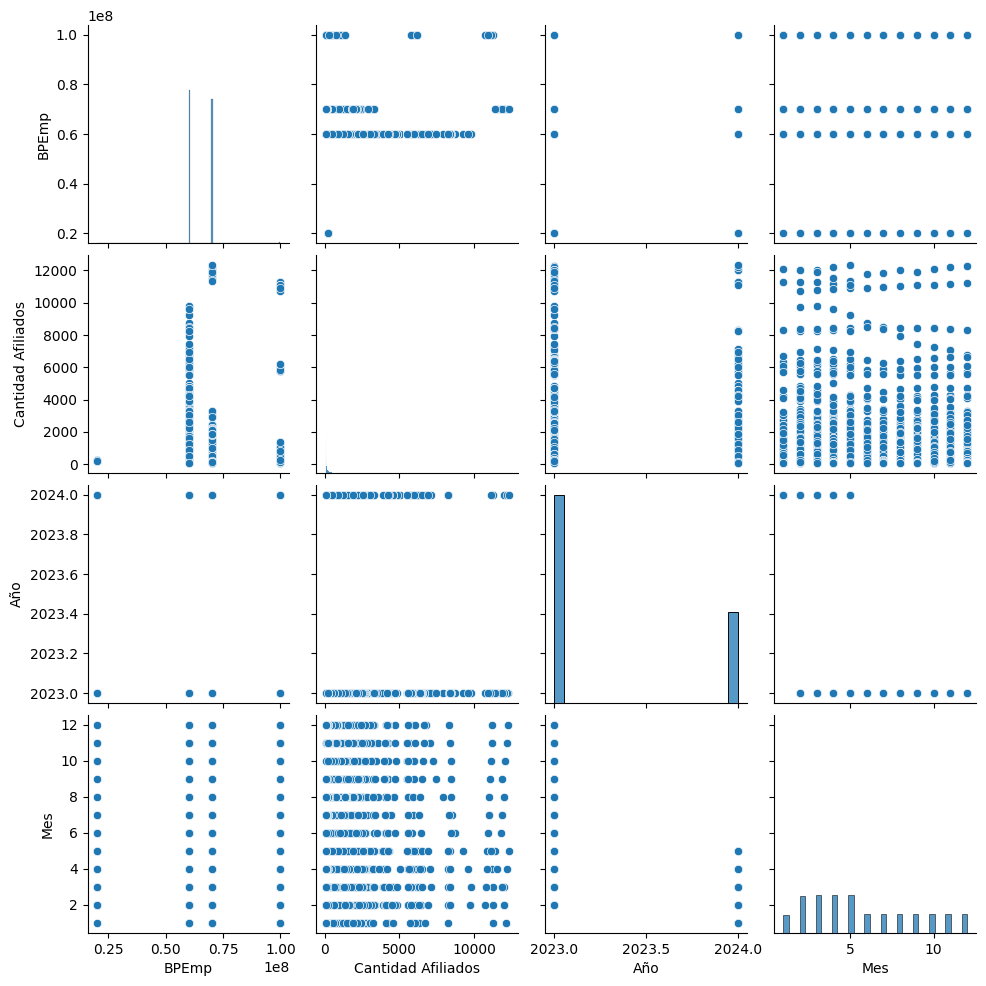

In [ ]:
#Bosquejo General. Búsqueda de Relaciones.
sns.pairplot(df)

Esta matriz no reveló algo que pueda ser muy relevante o siquiera interesante.

## 2.

### Análisis exploratorio

#### Análisis univariado por campo: `Cantidad Afiliados`

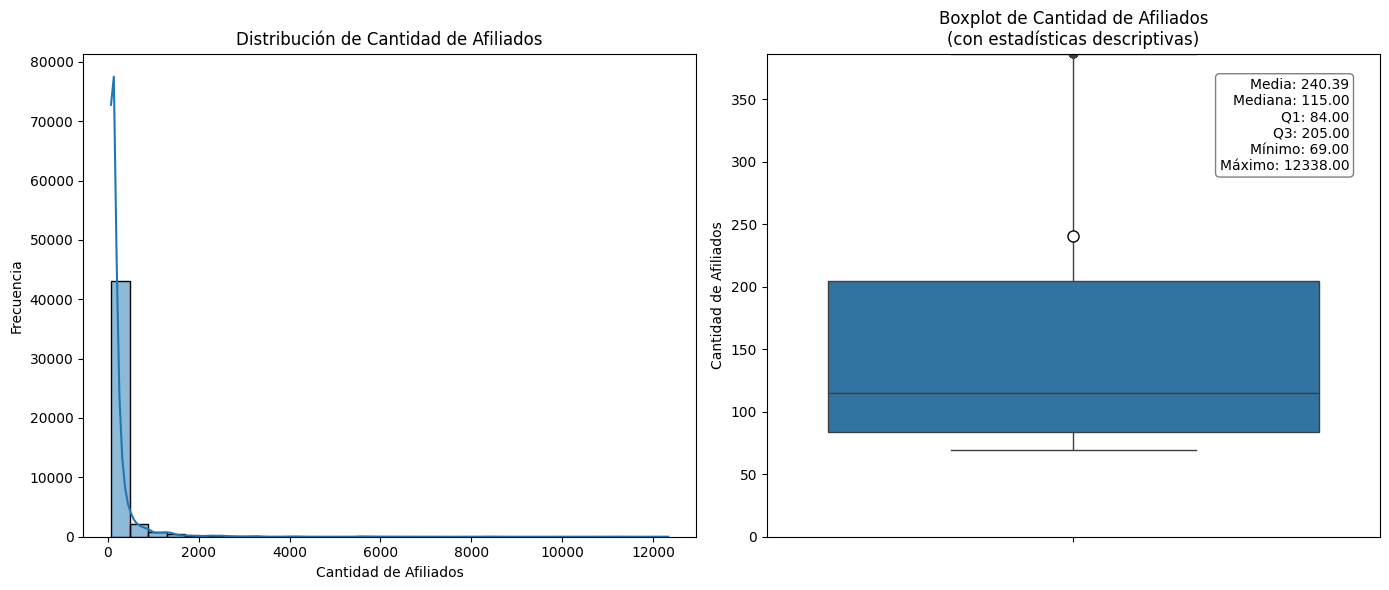


Estadísticas detalladas de Cantidad Afiliados:
count       47232.0
mean     240.391768
std      539.124254
min            69.0
25%            84.0
50%           115.0
75%           205.0
max         12338.0
Name: Cantidad Afiliados, dtype: Float64


In [ ]:
plt.figure(figsize=(14, 6))

#Distribución de la Cantidad de Afiliados, en un histograma
plt.subplot(1, 2, 1)
sns.histplot(df['Cantidad Afiliados'], kde=True, bins=30)
plt.title('Distribución de Cantidad de Afiliados')
plt.xlabel('Cantidad de Afiliados')
plt.ylabel('Frecuencia')

#Diagrama de cajas y bigotes para intentar encontrar datos atípicos de la cantidad de afiliados
plt.subplot(1, 2, 2)
ax = sns.boxplot(y=df['Cantidad Afiliados'], 
                showmeans=True,  # Mostrar la media
                meanprops={'marker':'o',  # Propiedades de la media
                          'markerfacecolor':'white',
                          'markeredgecolor':'black',
                          'markersize':'8'})

# Mostrar una tabla con las convenciones de valores importantes
stats = df['Cantidad Afiliados'].describe()
textstr = '\n'.join((
    f'Media: {stats["mean"]:.2f}',
    f'Mediana: {stats["50%"]:.2f}',
    f'Q1: {stats["25%"]:.2f}',
    f'Q3: {stats["75%"]:.2f}',
    f'Mínimo: {stats["min"]:.2f}',
    f'Máximo: {stats["max"]:.2f}'))

props = dict(boxstyle='round', facecolor='white', alpha=0.5) #Ponemos en formato de texto las estadísticas principales
ax.text(0.95, 0.95, textstr, transform=ax.transAxes, 
        verticalalignment='top', horizontalalignment='right', bbox=props)

plt.title('Boxplot de Cantidad de Afiliados\n(con estadísticas descriptivas)')
plt.ylabel('Cantidad de Afiliados')

# Ajustamos los límites del eje y si hay muchos outliers. PDTA: Hay muchos
q1 = stats["25%"]
q3 = stats["75%"]
iqr = q3 - q1
upper_bound = q3 + 1.5*iqr
plt.ylim(bottom=0, top=min(upper_bound, stats["max"]))  # Limitar vista a 1.5*IQR, en estadística es lo estándar

plt.tight_layout()
plt.show()

print("\nEstadísticas detalladas de Cantidad Afiliados:")
print(df['Cantidad Afiliados'].describe())

Es interesante ver que aunque a lo largo del tiempo se ha afiliado una cantidad muy grande de personas, por lo general el número de afiliados en un solo registro es de alrededor de 240.

Por ejemplo, Observe que hay algunos regsitros que muestran la afiliación de mas de 4000 trabajadores a la caja de compensaciones con las empresas, como el caso de la empresa que registró 12338, el cual es un número bastante alto comparado con la media o el estandar de afiliados (240)

#### Análisis de distribuciones por campos categóricos

Para analizar los comportamientos de las afiliaciones respecto a las distintas categorías que tiene el dataframe, creo una función que compara datos atípicos por campo, mediante boxplots (conocidos como diagramas de cajas y bigotes), los cuales son muy útiles para detectar outliers y despreciarlos o no dependiendo de los factores generales y específicos que se estén considerando.  

In [ ]:
def boxplot_categorias(df, categoria1, categoria2):

    if categoria1=='SeccionEconomicaEmp' or categoria1=='ClaseEconomica':
        aux = (df.groupby(categoria1)[categoria2].sum().nlargest(20).index)
    else:
        aux = sorted(df[categoria1].unique())

    data_by_category = [df[df[categoria1] == d][categoria2] for d in aux]
    #data_by_category = [df[df[categoria1] == d][categoria2] for d in top20]
    
    plt.figure(figsize=(8, 2 + len(aux)*0.5))
    # Limitar outliers automáticamente
    box_plot = plt.boxplot(
        data_by_category,
        vert=False,
        tick_labels=[str(d) for d in aux],  # tick_labels
        manage_ticks=True,
        showfliers=True,    # Mostrar outliers
        flierprops=dict(marker='o', markersize=3, alpha=0.5)  # Outliers más pequeños
    )
    
    # Calcular límites apropiados basados en percentiles
    all_data = df[categoria2]
    q1 = all_data.quantile(0.25)
    q3 = all_data.quantile(0.75)
    iqr = q3 - q1
    # Límites convencionales (1.5 * IQR más allá de Q1 y Q3)
    lower_limit = max(0, q1 - 1.5 * iqr)
    upper_limit = q3 + 1.5 * iqr
    
    # Aplicar límites al eje X
    plt.xlim(lower_limit, upper_limit)
    plt.title(f'Distribución {categoria2} por {categoria1}')
    plt.xlabel(f'{categoria2}')
    plt.ylabel(f'{categoria1}')
    plt.grid(True, alpha=0.3, axis='x')  # Rejilla suave para mejor lectura
    plt.tight_layout()
    plt.show()
    
    # Información adicional sobre los límites aplicados
    print(f"Límites del gráfico:")
    print(f"Límite inferior: {lower_limit:.0f}")
    print(f"Límite superior: {upper_limit:.0f}")
    print(f"Valores fuera del rango (TOTAL): {len(all_data[(all_data < lower_limit) | (all_data > upper_limit)])}")
    
    # Contar outliers por categoría (Gráfico 1 - IQR)
    print(f"\n=== OUTLIERS POR CATEGORÍA (Límites IQR) ===")
    print("-" * 50)
    
    total_outliers_iqr = 0
    for categoria in aux:
        cat_data = df[df[categoria1] == categoria][categoria2].dropna()
        outliers_cat = cat_data[(cat_data < lower_limit) | (cat_data > upper_limit)]
        total_outliers_iqr += len(outliers_cat)
        
        porcentaje = (len(outliers_cat) / len(cat_data) * 100) if len(cat_data) > 0 else 0
        print(f"{categoria}:")
        print(f"  Total registros: {len(cat_data)}")
        print(f"  Outliers: {len(outliers_cat)} ({porcentaje:.1f}%)")
        print(f"  Mediana: {cat_data.median():.0f}")
        print()
    
    print(f"Total outliers encontrados: {total_outliers_iqr}")
    
    # alternativa con percentiles más estrictos
    plt.figure(figsize=(8, 2 + len(aux)*0.5))
    # Usar percentiles 5 y 95 para límites más estrictos
    p5 = all_data.quantile(0.05)
    p95 = all_data.quantile(0.95)
    
    plt.boxplot(
        data_by_category,
        vert=False,
        tick_labels=[str(d) for d in aux],
        manage_ticks=True,
        showfliers=True,
        flierprops=dict(marker='o', markersize=2, alpha=0.3)
    )
    
    plt.xlim(p5, p95)
    plt.title(f'Distribución de {categoria2} por {categoria1} (Vista Ampliada)')
    plt.xlabel(f'{categoria2}')
    plt.ylabel(f'{categoria1}')
    plt.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.show()
    
    print(f"\nLímites alternativos (percentiles 5-95):")
    print(f"Percentil 5: {p5:.0f}")
    print(f"Percentil 95: {p95:.0f}")
    
    # Contar outliers por categoría (Gráfico 2 - Percentiles)
    print(f"\n=== OUTLIERS POR CATEGORÍA (Límites Percentiles 5-95) ===")
    print("-" * 60)
    
    total_outliers_perc = 0
    for categoria in aux:
        cat_data = df[df[categoria1] == categoria][categoria2].dropna()
        outliers_cat = cat_data[(cat_data < p5) | (cat_data > p95)]
        total_outliers_perc += len(outliers_cat)
        
        porcentaje = (len(outliers_cat) / len(cat_data) * 100) if len(cat_data) > 0 else 0
        print(f"{categoria}:")
        print(f"  Total registros: {len(cat_data)}")
        print(f"  Outliers: {len(outliers_cat)} ({porcentaje:.1f}%)")
        print(f"  Mediana: {cat_data.median():.0f}")
        print()
    
    print(f"Total outliers encontrados: {total_outliers_perc}")

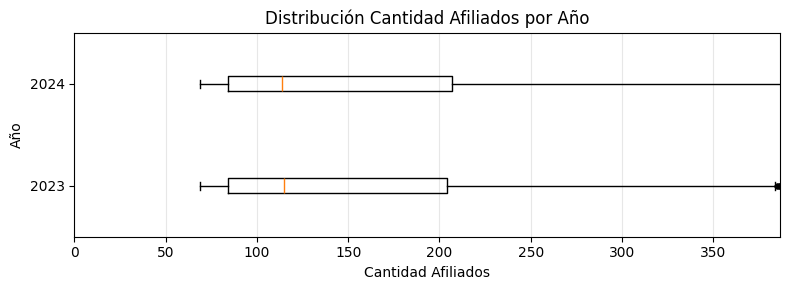

Límites del gráfico:
Límite inferior: 0
Límite superior: 386
Valores fuera del rango (TOTAL): 5220

=== OUTLIERS POR CATEGORÍA (Límites IQR) ===
--------------------------------------------------
2023:
  Total registros: 32812
  Outliers: 3580 (10.9%)
  Mediana: 115

2024:
  Total registros: 14420
  Outliers: 1640 (11.4%)
  Mediana: 114

Total outliers encontrados: 5220


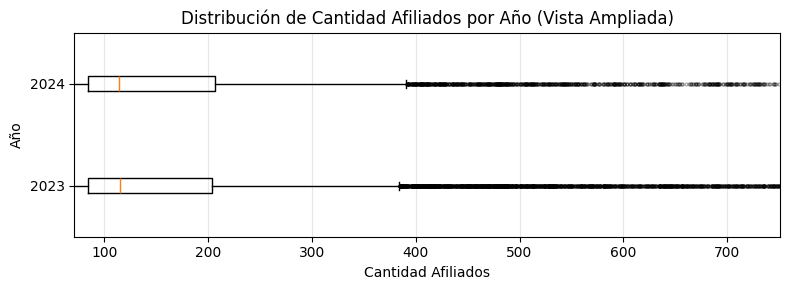


Límites alternativos (percentiles 5-95):
Percentil 5: 71
Percentil 95: 751

=== OUTLIERS POR CATEGORÍA (Límites Percentiles 5-95) ===
------------------------------------------------------------
2023:
  Total registros: 32812
  Outliers: 2977 (9.1%)
  Mediana: 115

2024:
  Total registros: 14420
  Outliers: 1336 (9.3%)
  Mediana: 114

Total outliers encontrados: 4313


In [ ]:
boxplot_categorias(df,'Año', 'Cantidad Afiliados')

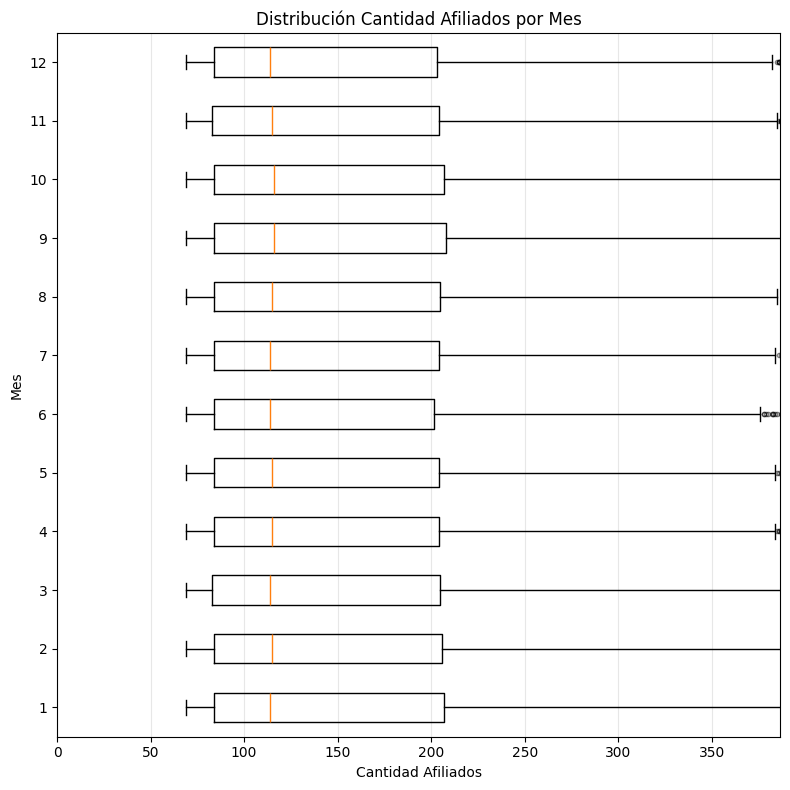

Límites del gráfico:
Límite inferior: 0
Límite superior: 386
Valores fuera del rango (TOTAL): 5220

=== OUTLIERS POR CATEGORÍA (Límites IQR) ===
--------------------------------------------------
1:
  Total registros: 2826
  Outliers: 316 (11.2%)
  Mediana: 114

2:
  Total registros: 5830
  Outliers: 656 (11.3%)
  Mediana: 115

3:
  Total registros: 5898
  Outliers: 659 (11.2%)
  Mediana: 114

4:
  Total registros: 5911
  Outliers: 659 (11.1%)
  Mediana: 115

5:
  Total registros: 5928
  Outliers: 656 (11.1%)
  Mediana: 115

6:
  Total registros: 3011
  Outliers: 322 (10.7%)
  Mediana: 114

7:
  Total registros: 2995
  Outliers: 319 (10.7%)
  Mediana: 114

8:
  Total registros: 2980
  Outliers: 326 (10.9%)
  Mediana: 115

9:
  Total registros: 2963
  Outliers: 325 (11.0%)
  Mediana: 116

10:
  Total registros: 2980
  Outliers: 329 (11.0%)
  Mediana: 116

11:
  Total registros: 3010
  Outliers: 331 (11.0%)
  Mediana: 115

12:
  Total registros: 2900
  Outliers: 322 (11.1%)
  Mediana: 11

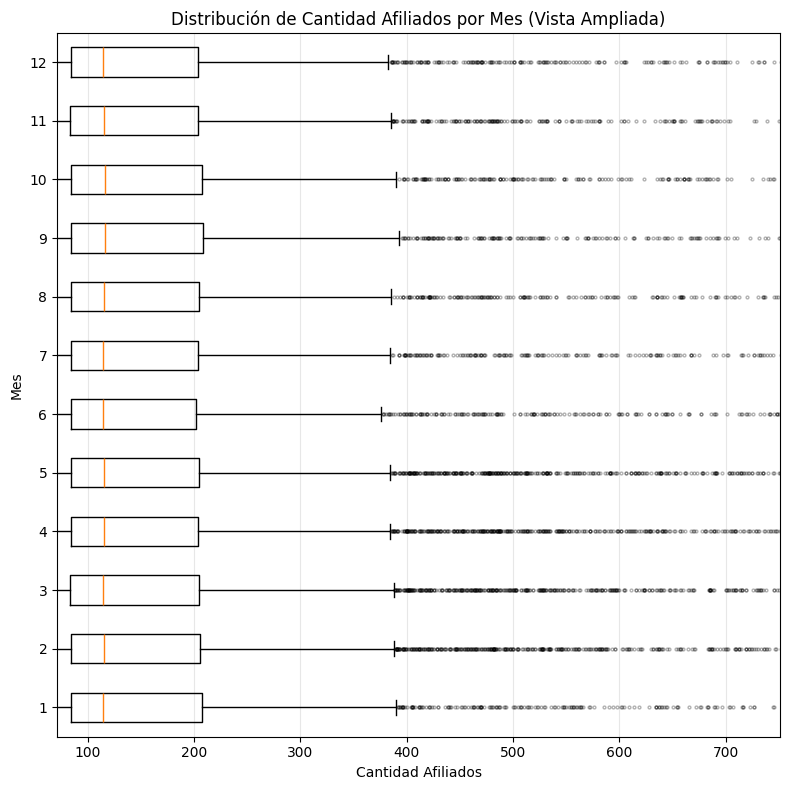


Límites alternativos (percentiles 5-95):
Percentil 5: 71
Percentil 95: 751

=== OUTLIERS POR CATEGORÍA (Límites Percentiles 5-95) ===
------------------------------------------------------------
1:
  Total registros: 2826
  Outliers: 266 (9.4%)
  Mediana: 114

2:
  Total registros: 5830
  Outliers: 527 (9.0%)
  Mediana: 115

3:
  Total registros: 5898
  Outliers: 550 (9.3%)
  Mediana: 114

4:
  Total registros: 5911
  Outliers: 510 (8.6%)
  Mediana: 115

5:
  Total registros: 5928
  Outliers: 543 (9.2%)
  Mediana: 115

6:
  Total registros: 3011
  Outliers: 266 (8.8%)
  Mediana: 114

7:
  Total registros: 2995
  Outliers: 284 (9.5%)
  Mediana: 114

8:
  Total registros: 2980
  Outliers: 291 (9.8%)
  Mediana: 115

9:
  Total registros: 2963
  Outliers: 272 (9.2%)
  Mediana: 116

10:
  Total registros: 2980
  Outliers: 271 (9.1%)
  Mediana: 116

11:
  Total registros: 3010
  Outliers: 277 (9.2%)
  Mediana: 115

12:
  Total registros: 2900
  Outliers: 256 (8.8%)
  Mediana: 114

Total out

In [ ]:
boxplot_categorias(df,'Mes','Cantidad Afiliados')

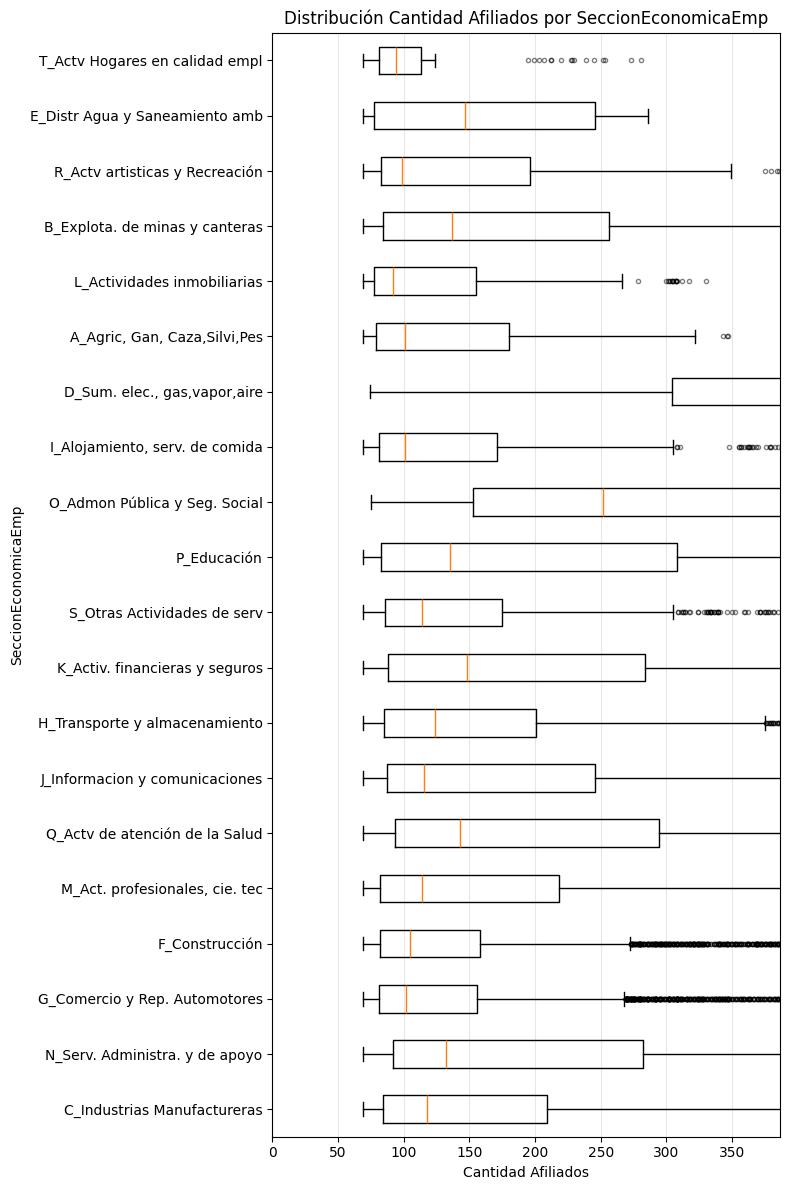

Límites del gráfico:
Límite inferior: 0
Límite superior: 386
Valores fuera del rango (TOTAL): 5220

=== OUTLIERS POR CATEGORÍA (Límites IQR) ===
--------------------------------------------------
C_Industrias Manufactureras:
  Total registros: 10118
  Outliers: 936 (9.3%)
  Mediana: 118

N_Serv. Administra. y de apoyo:
  Total registros: 4157
  Outliers: 782 (18.8%)
  Mediana: 132

G_Comercio y Rep. Automotores:
  Total registros: 7508
  Outliers: 465 (6.2%)
  Mediana: 102

F_Construcción:
  Total registros: 6110
  Outliers: 324 (5.3%)
  Mediana: 105

M_Act. profesionales, cie. tec:
  Total registros: 3429
  Outliers: 436 (12.7%)
  Mediana: 114

Q_Actv de atención de la Salud:
  Total registros: 2279
  Outliers: 465 (20.4%)
  Mediana: 143

J_Informacion y comunicaciones:
  Total registros: 2214
  Outliers: 328 (14.8%)
  Mediana: 116

H_Transporte y almacenamiento:
  Total registros: 3009
  Outliers: 241 (8.0%)
  Mediana: 124

K_Activ. financieras y seguros:
  Total registros: 1127
  Ou

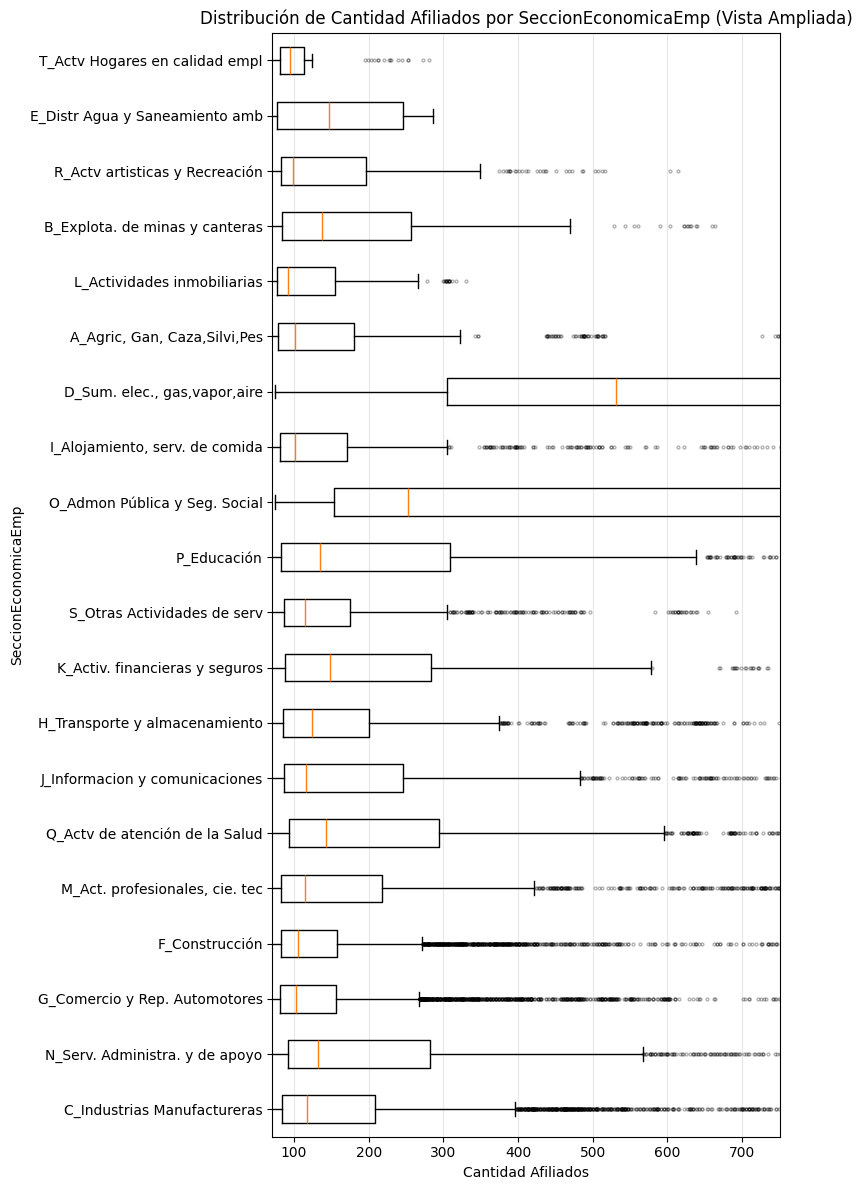


Límites alternativos (percentiles 5-95):
Percentil 5: 71
Percentil 95: 751

=== OUTLIERS POR CATEGORÍA (Límites Percentiles 5-95) ===
------------------------------------------------------------
C_Industrias Manufactureras:
  Total registros: 10118
  Outliers: 883 (8.7%)
  Mediana: 118

N_Serv. Administra. y de apoyo:
  Total registros: 4157
  Outliers: 613 (14.7%)
  Mediana: 132

G_Comercio y Rep. Automotores:
  Total registros: 7508
  Outliers: 498 (6.6%)
  Mediana: 102

F_Construcción:
  Total registros: 6110
  Outliers: 371 (6.1%)
  Mediana: 105

M_Act. profesionales, cie. tec:
  Total registros: 3429
  Outliers: 381 (11.1%)
  Mediana: 114

Q_Actv de atención de la Salud:
  Total registros: 2279
  Outliers: 296 (13.0%)
  Mediana: 143

J_Informacion y comunicaciones:
  Total registros: 2214
  Outliers: 173 (7.8%)
  Mediana: 116

H_Transporte y almacenamiento:
  Total registros: 3009
  Outliers: 184 (6.1%)
  Mediana: 124

K_Activ. financieras y seguros:
  Total registros: 1127
  Out

In [ ]:
boxplot_categorias(df,'SeccionEconomicaEmp','Cantidad Afiliados')

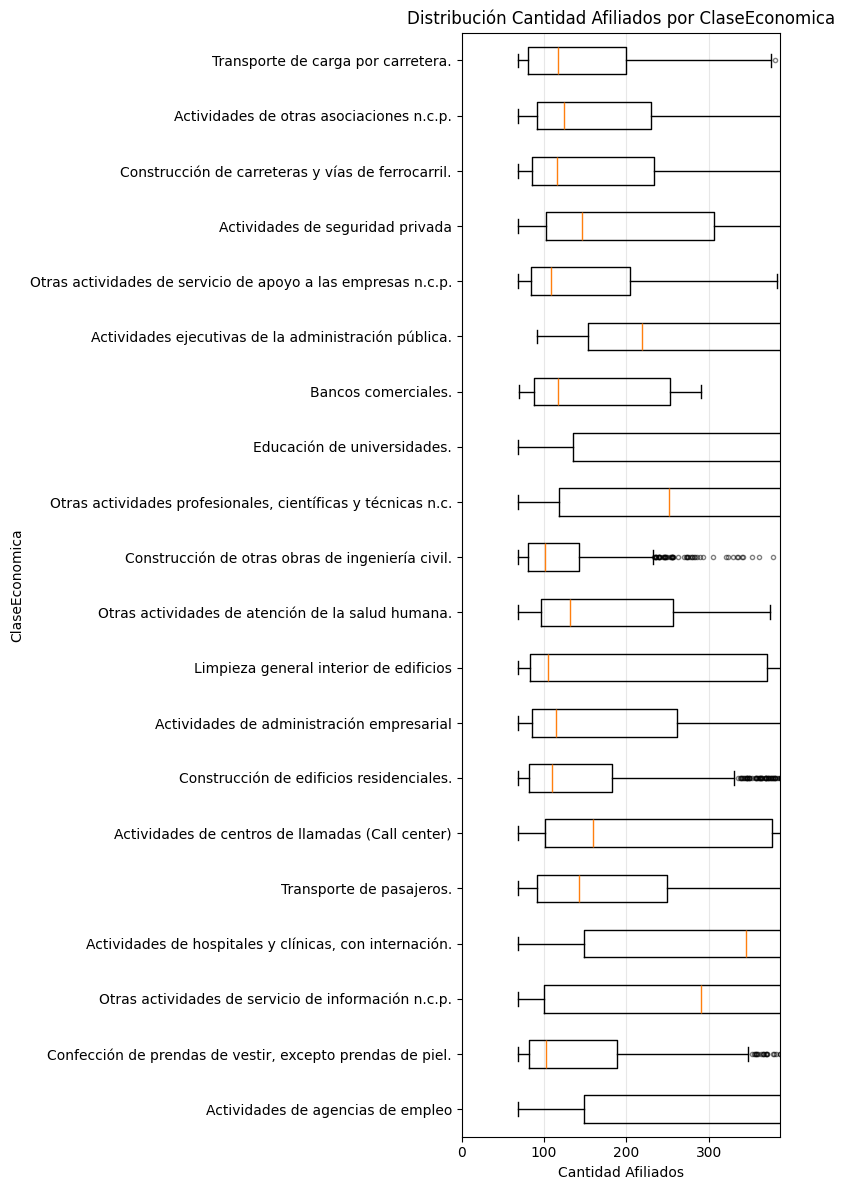

Límites del gráfico:
Límite inferior: 0
Límite superior: 386
Valores fuera del rango (TOTAL): 5220

=== OUTLIERS POR CATEGORÍA (Límites IQR) ===
--------------------------------------------------
Actividades de agencias de empleo:
  Total registros: 541
  Outliers: 274 (50.6%)
  Mediana: 409

Confección de prendas de vestir, excepto prendas de piel.:
  Total registros: 2242
  Outliers: 193 (8.6%)
  Mediana: 103

Otras actividades de servicio de información n.c.p.:
  Total registros: 300
  Outliers: 78 (26.0%)
  Mediana: 290

Actividades de hospitales y clínicas, con internación.:
  Total registros: 481
  Outliers: 231 (48.0%)
  Mediana: 345

Transporte de pasajeros.:
  Total registros: 1166
  Outliers: 158 (13.6%)
  Mediana: 143

Actividades de centros de llamadas (Call center):
  Total registros: 658
  Outliers: 156 (23.7%)
  Mediana: 160

Construcción de edificios residenciales.:
  Total registros: 1685
  Outliers: 107 (6.4%)
  Mediana: 110

Actividades de administración empresarial:

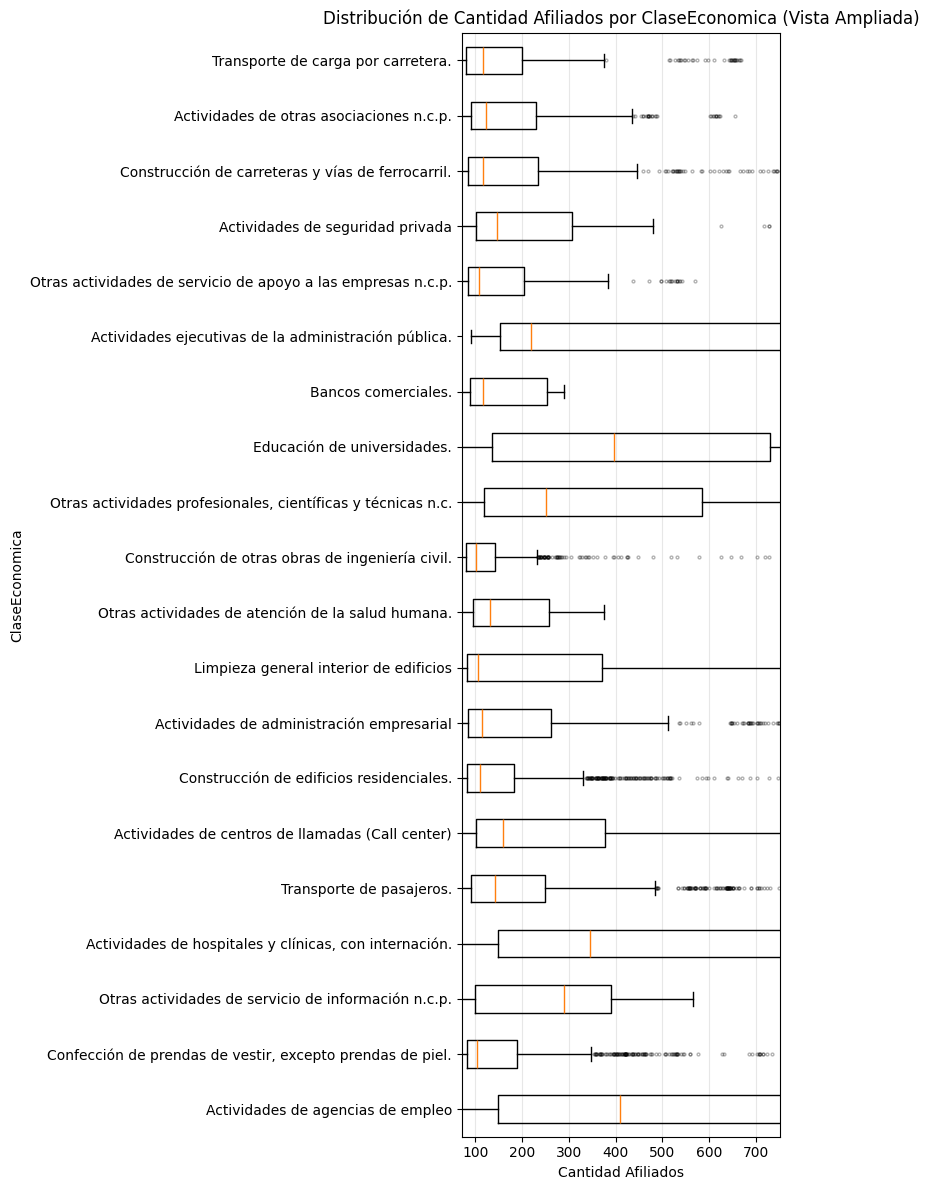


Límites alternativos (percentiles 5-95):
Percentil 5: 71
Percentil 95: 751

=== OUTLIERS POR CATEGORÍA (Límites Percentiles 5-95) ===
------------------------------------------------------------
Actividades de agencias de empleo:
  Total registros: 541
  Outliers: 210 (38.8%)
  Mediana: 409

Confección de prendas de vestir, excepto prendas de piel.:
  Total registros: 2242
  Outliers: 205 (9.1%)
  Mediana: 103

Otras actividades de servicio de información n.c.p.:
  Total registros: 300
  Outliers: 39 (13.0%)
  Mediana: 290

Actividades de hospitales y clínicas, con internación.:
  Total registros: 481
  Outliers: 145 (30.1%)
  Mediana: 345

Transporte de pasajeros.:
  Total registros: 1166
  Outliers: 60 (5.1%)
  Mediana: 143

Actividades de centros de llamadas (Call center):
  Total registros: 658
  Outliers: 128 (19.5%)
  Mediana: 160

Construcción de edificios residenciales.:
  Total registros: 1685
  Outliers: 98 (5.8%)
  Mediana: 110

Actividades de administración empresarial:
  

In [ ]:
boxplot_categorias(df,'ClaseEconomica', 'Cantidad Afiliados')

#### En esta sección voy a observar el comportamiento del número de registros por empresa-No es lo mismo el número de registros al número de afiliaciones.

Esto lo hago con el porpósito de determinar si es cierto que entre más registros haga una empresa, significa que hace más afiliaciones (lo que parece lógico). Sin embargo, cabe la posibilidad de que una empresa con menos registros tenga más afiliaciones que otra que tiena más registros. 

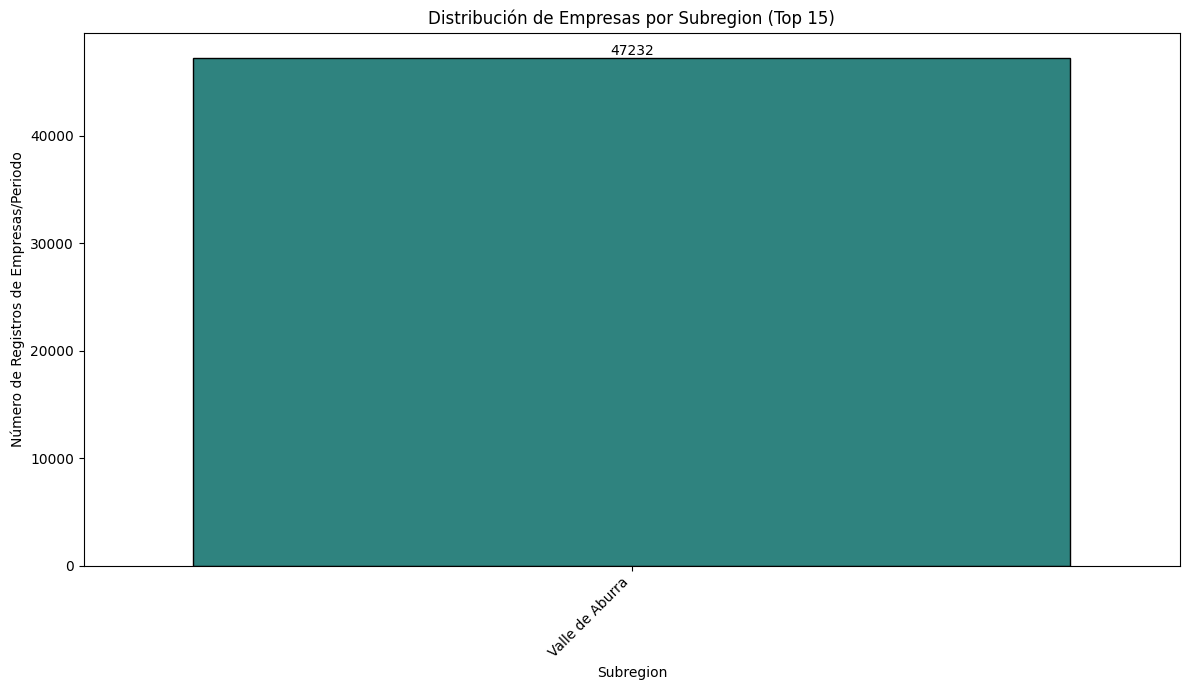


Frecuencias para Subregion:
Subregion
Valle de Aburra    47232
Name: count, dtype: Int64


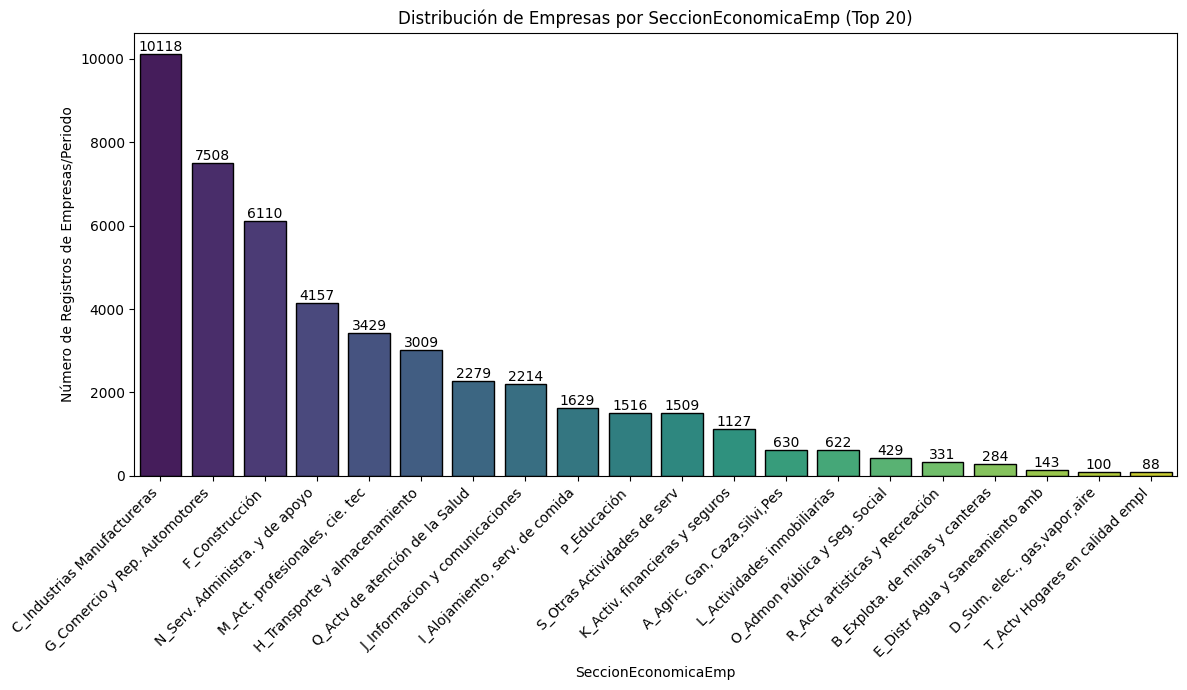


Frecuencias para SeccionEconomicaEmp:
SeccionEconomicaEmp
C_Industrias Manufactureras       10118
G_Comercio y Rep. Automotores      7508
F_Construcción                     6110
N_Serv. Administra. y de apoyo     4157
M_Act. profesionales, cie. tec     3429
H_Transporte y almacenamiento      3009
Q_Actv de atención de la Salud     2279
J_Informacion y comunicaciones     2214
I_Alojamiento, serv. de comida     1629
P_Educación                        1516
S_Otras Actividades de serv        1509
K_Activ. financieras y seguros     1127
A_Agric, Gan, Caza,Silvi,Pes        630
L_Actividades inmobiliarias         622
O_Admon Pública y Seg. Social       429
R_Actv artisticas y Recreación      331
B_Explota. de minas y canteras      284
E_Distr Agua y Saneamiento amb      143
D_Sum. elec., gas,vapor,aire        100
T_Actv Hogares en calidad empl       88
Name: count, dtype: Int64


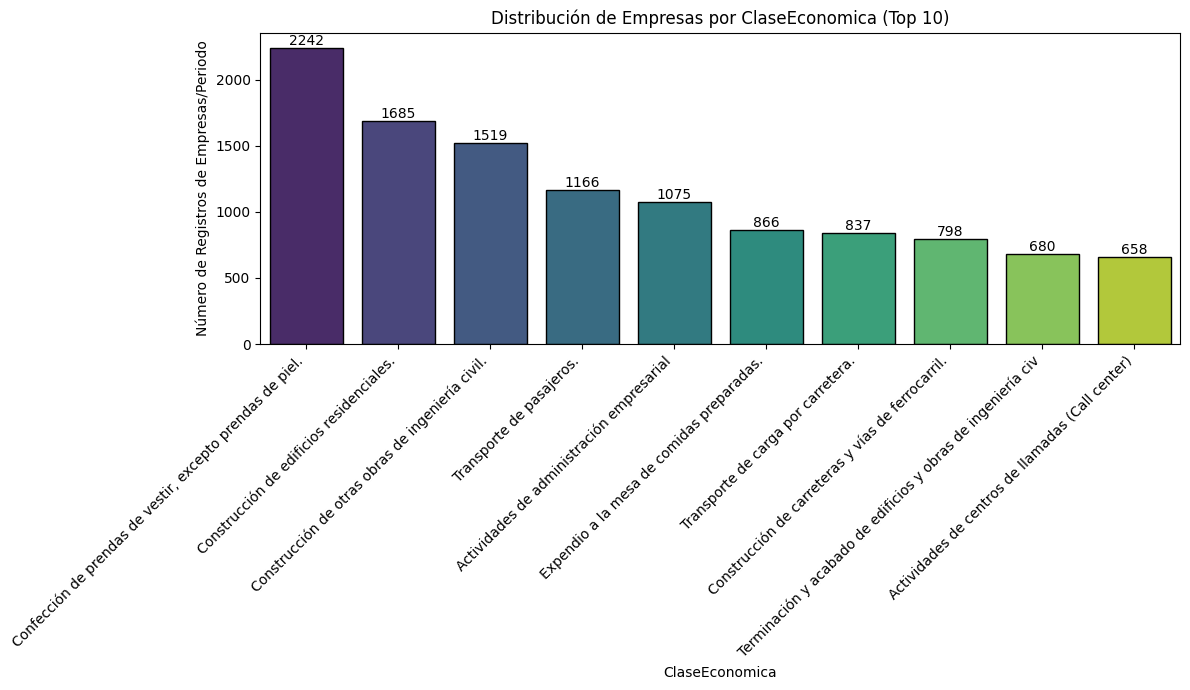


Frecuencias para ClaseEconomica:
ClaseEconomica
Confección de prendas de vestir, excepto prendas de piel.       2242
Construcción de edificios residenciales.                        1685
Construcción de otras obras de ingeniería civil.                1519
Transporte de pasajeros.                                        1166
Actividades de administración empresarial                       1075
                                                                ... 
Fabricación de tanques, depósitos y recipientes de metal, ex       3
Recolección de desechos peligrosos                                 3
Mantenimiento y reparación especializado de equipo electróni       2
Actividades veterinarias                                           2
Mantenimiento y reparación de equipos de comunicación              1
Name: count, Length: 330, dtype: Int64


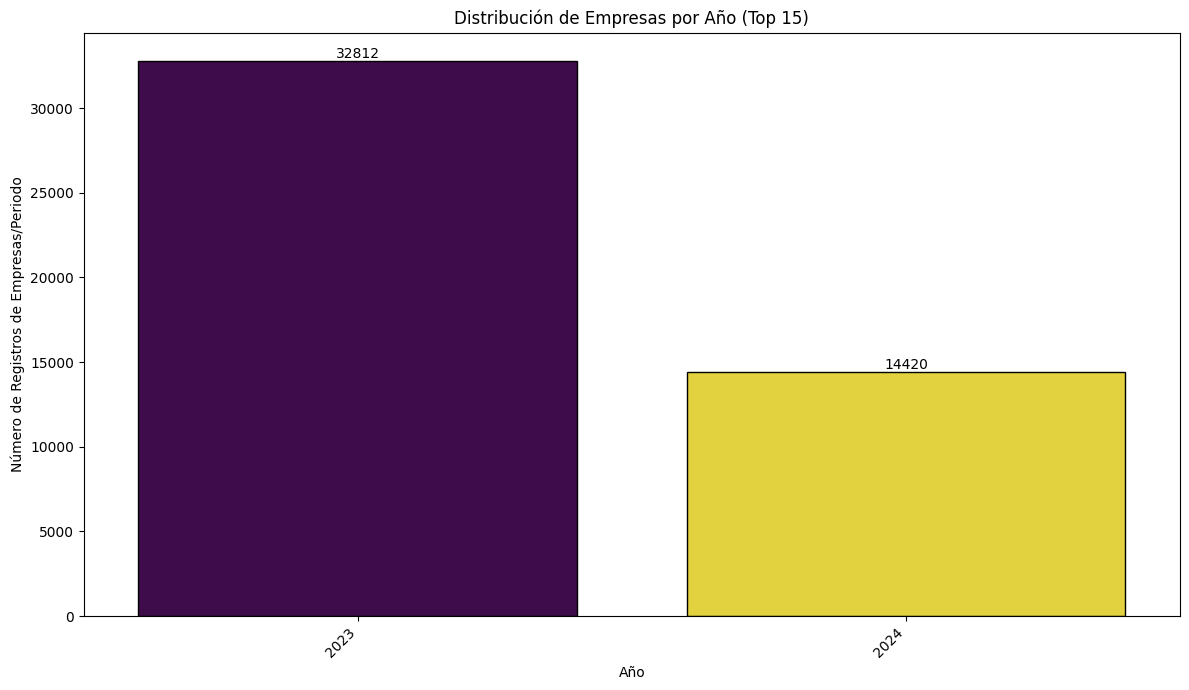


Frecuencias para Año:
Año
2023    32812
2024    14420
Name: count, dtype: int64


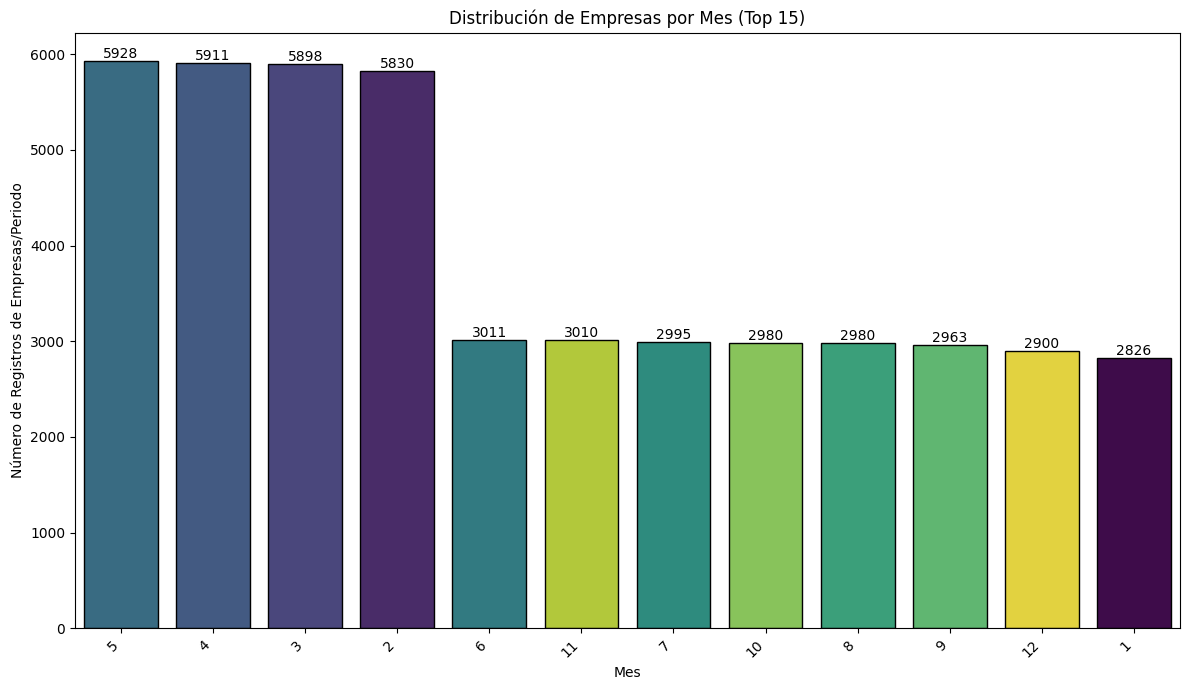


Frecuencias para Mes:
Mes
5     5928
4     5911
3     5898
2     5830
6     3011
11    3010
7     2995
10    2980
8     2980
9     2963
12    2900
1     2826
Name: count, dtype: int64


In [ ]:
#A continuación creo una función para hacer gráficos de barras de las categorías que yo seleccione.
def plot_distribucion_categorias(df, column_name, top_n=15):
    plt.figure(figsize=(12, 7))
    counts = df[column_name].value_counts().nlargest(top_n)
    
    ax = sns.barplot(
        x=counts.index, 
        y=counts.values, 
        hue=counts.index,
        palette="viridis", 
        order=counts.index, 
        legend=False,
        edgecolor='black' 
    )
    
    plt.title(f'Distribución de Empresas por {column_name} (Top {top_n})')
    plt.xlabel(column_name)
    plt.ylabel('Número de Registros de Empresas/Periodo')
    
    # Rotar etiquetas del eje x
    plt.xticks(rotation=45, ha='right')
    
    # Añadir los valores encima de cada barra
    for p in ax.patches:
        ax.annotate(
            f'{int(p.get_height())}', 
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha='center', 
            va='center', 
            xytext=(0, 5), 
            textcoords='offset points'
        )
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nFrecuencias para {column_name}:")
    print(df[column_name].value_counts())

plot_distribucion_categorias(df, 'Subregion')

plot_distribucion_categorias(df, 'SeccionEconomicaEmp', top_n=20)

plot_distribucion_categorias(df, 'ClaseEconomica', top_n=10)

plot_distribucion_categorias(df, 'Año')

plot_distribucion_categorias(df, 'Mes')

Grafiqué en diagramas de barras el número de registro de las empresas afiliadas a Comfama respecto a las distintas categorías que se podrían seleccionar, esto con el objetivo de hacer una caracterización visible.

##### Importante: Note que en los gráficos anteriores que llamé "univariados" se analizan las categorías por cantidad de registros en la tabla, no por cantidad de afilidos de cada categoría. Debe quedar claro, ya que no es lo mismo el número de afiliados al número de registros. 

#### Análisis por pares

Ahora sí, procedemos a hacer el mismo análisis pero con el número de afiliados ```Cantidad Afiliados```

In [ ]:
def plot_afiliados_por_categoria(df, categoria1, categoria2):
    resumen = df.groupby(categoria1)[categoria2].sum().nlargest(20).sort_values(ascending=False)

    ax = resumen.plot.bar(
        figsize=(14, 7),
        edgecolor='black', 
        color='skyblue'    
    )

    plt.title(f'{categoria2} por {categoria1}', fontsize=14)
    plt.ylabel(f'{categoria2}', fontsize=12)
    plt.xticks(rotation=45, ha='right')

    # Añadir los valores encima de cada barra
    for p in ax.patches:
        height = p.get_height()
        # Mostrar en millones si los valores son muy grandes (ej: 1.5M en vez de 1,500,000)
        if height >= 1_000_000:
            label_text = f'{height/1_000_000:.1f}M'
        else:
            label_text = f'{int(height):,}'

        ax.annotate(
            label_text,
            (p.get_x() + p.get_width() / 2., height),
            ha='center',
            va='center',
            xytext=(0, 5),
            textcoords='offset points',
            fontsize=10
        )

    plt.tight_layout()
    plt.show()

#### Cantidad Afiliados por `SeccionEconomicaEmp`

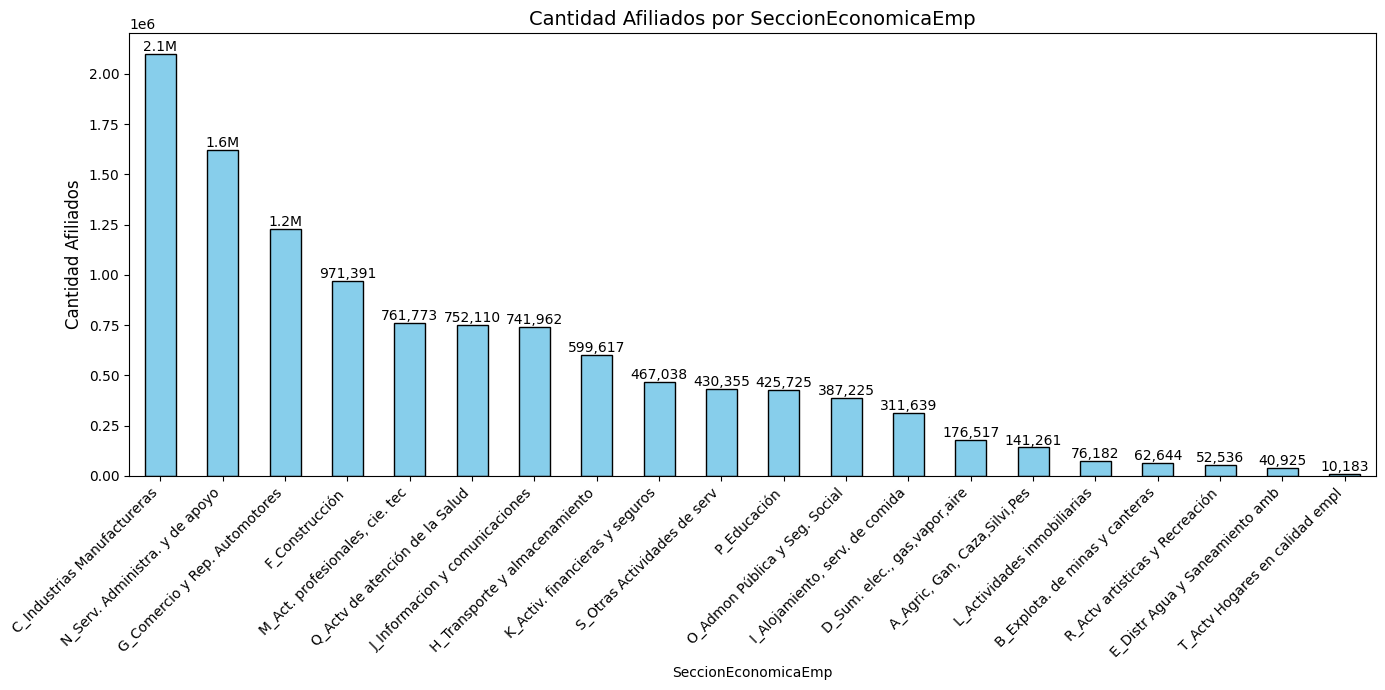

In [ ]:
plot_afiliados_por_categoria(df, 'SeccionEconomicaEmp', 'Cantidad Afiliados')

#### Cantidad Afiliados por `ClaseEconomica`

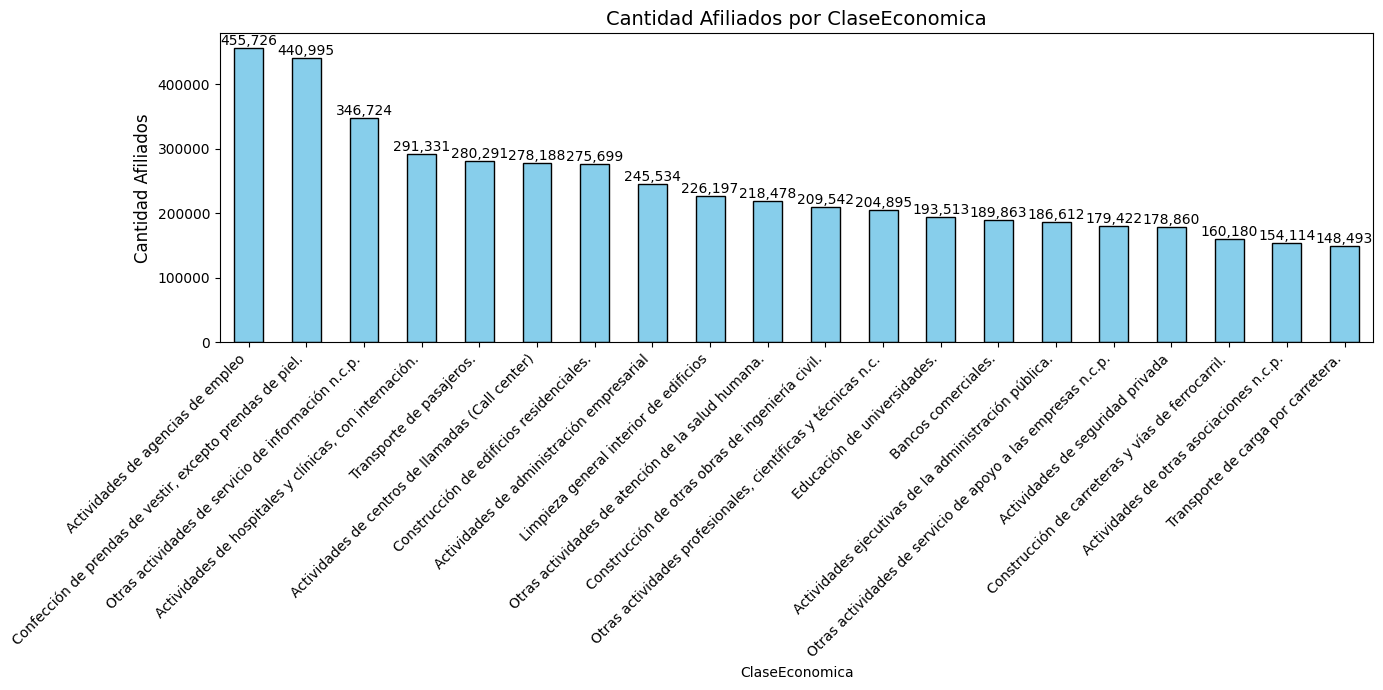

In [ ]:
plot_afiliados_por_categoria(df, 'ClaseEconomica', 'Cantidad Afiliados')

#### Cantidad Afiliados por `Año`

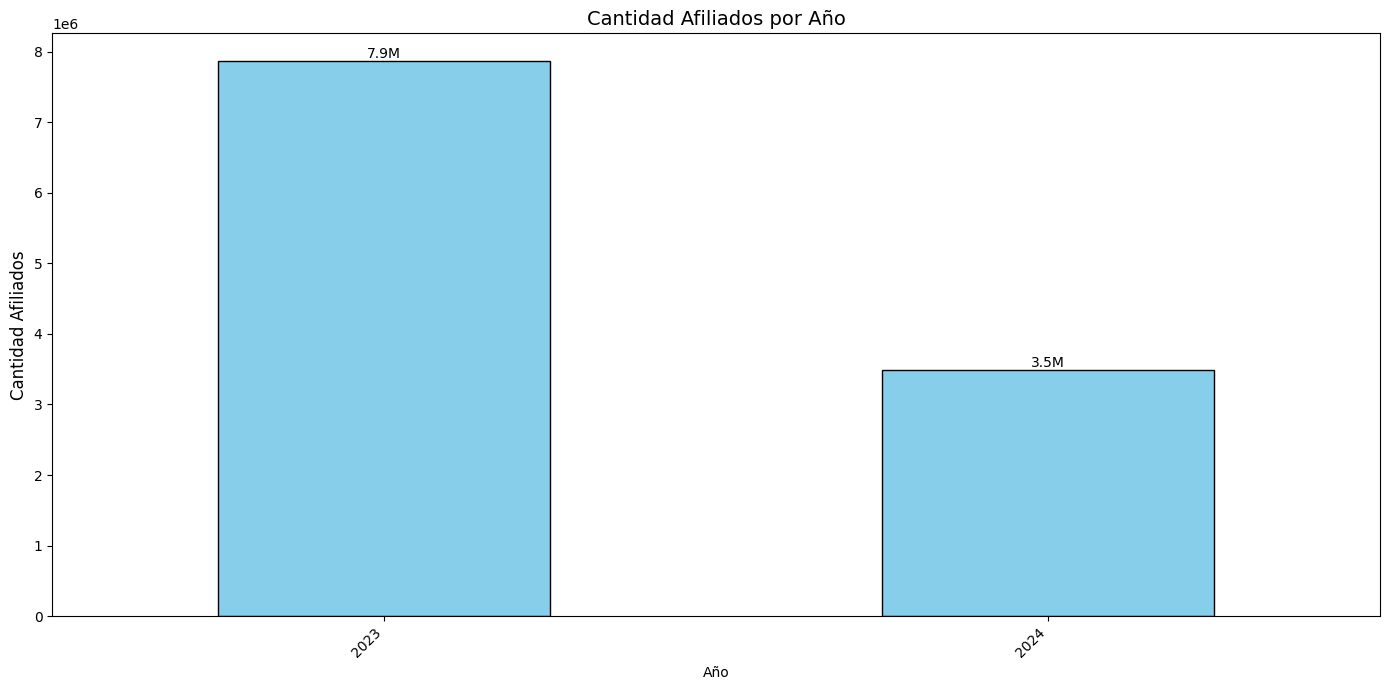

In [ ]:
plot_afiliados_por_categoria(df, 'Año', 'Cantidad Afiliados')

#### Cantidad Afiliados por `Mes`

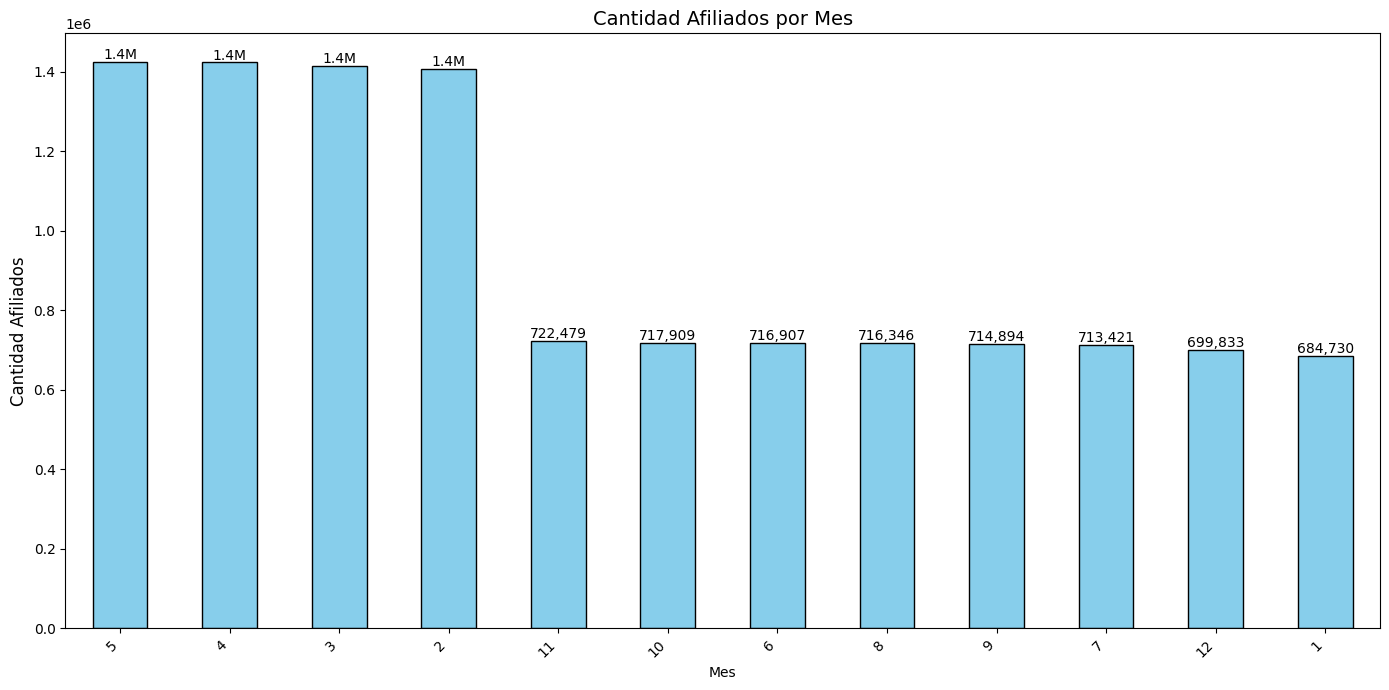

In [ ]:
plot_afiliados_por_categoria(df, 'Mes', 'Cantidad Afiliados')


Tabla pivotante generada:
SeccionEconomicaEmp  A_Agric, Gan, Caza,Silvi,Pes  \
Año                                                 
2023                                      99808.0   
2024                                      41453.0   

SeccionEconomicaEmp  B_Explota. de minas y canteras  \
Año                                                   
2023                                        43878.0   
2024                                        18766.0   

SeccionEconomicaEmp  C_Industrias Manufactureras  \
Año                                                
2023                                   1456447.0   
2024                                    640288.0   

SeccionEconomicaEmp  D_Sum. elec., gas,vapor,aire  \
Año                                                 
2023                                     122484.0   
2024                                      54033.0   

SeccionEconomicaEmp  E_Distr Agua y Saneamiento amb  F_Construcción  \
Año                                           

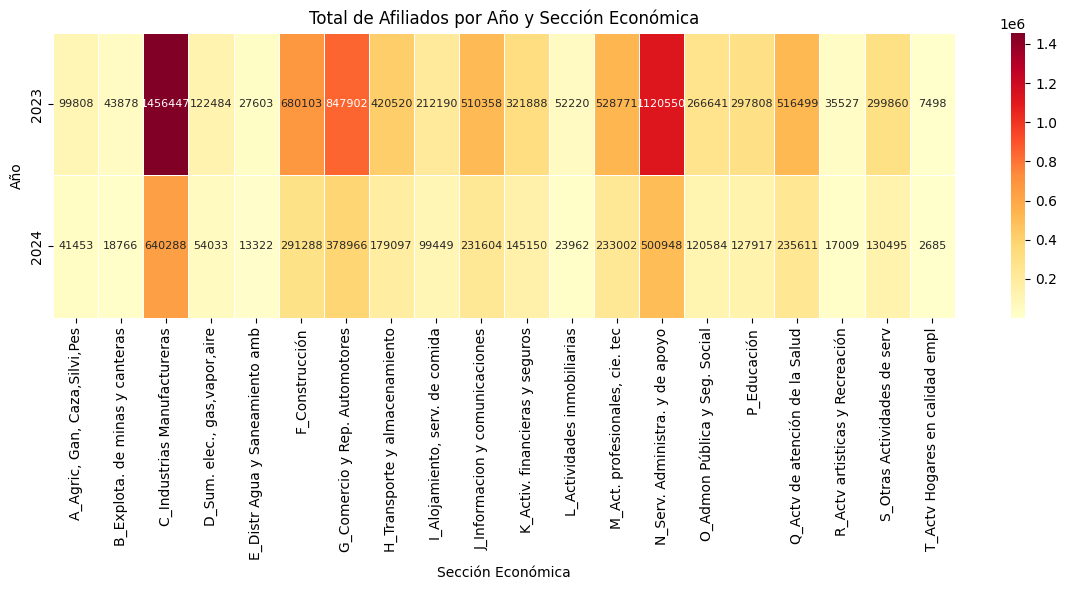

In [ ]:
# Creamos la tabla pivotante con verificación
try:
    pivot = df.pivot_table(
        index='Año',
        columns='SeccionEconomicaEmp',
        values='Cantidad Afiliados',
        aggfunc='sum',
        fill_value=0
    )
    
    # Conversión final a float (seguridad adicional)
    pivot = pivot.astype(float)
    
    print("\nTabla pivotante generada:")
    print(pivot.head())
    
except Exception as e:
    print(f"Error al crear pivot: {e}")
    raise

# 6. Visualización con controles adicionales
plt.figure(figsize=(12, 6))

# Verificación final antes de graficar
if not pivot.empty and pivot.select_dtypes(include=['number']).shape == pivot.shape:
    sns.heatmap(
        pivot,
        annot=True,
        fmt='.0f',  # Formato para números enteros
        cmap='YlOrRd',
        linewidths=0.5,
        annot_kws={'size': 8}  # Tamaño de fuente para anotaciones
    )
    plt.title('Total de Afiliados por Año y Sección Económica')
    plt.xlabel('Sección Económica')
    plt.ylabel('Año')
    plt.tight_layout()
    plt.show()
else:
    print("¡Advertencia! La tabla pivotante contiene valores no numéricos o está vacía.")
    print("Tipos de datos en pivot:")
    print(pivot.dtypes)

Este mapa de calor dice mucho respecto al decrecimiento de afiliaciones de un año respecto al anterior. En general cada sección económica ha disminuido el número de afiliados. Esto pude verse reflejado en pérdidas económicas.

In [10]:
list_of_analyses = []

# 1. Estadísticas descriptivas generales de Cantidad Afiliados
desc_stats_afiliados = df['Cantidad Afiliados'].describe().reset_index()
desc_stats_afiliados.columns = ['Estadistica', 'Valor']
desc_stats_afiliados['Tipo_Analisis'] = 'Estadisticas Generales Cantidad Afiliados'
desc_stats_afiliados['Item_Analisis'] = 'General'
desc_stats_afiliados = desc_stats_afiliados[['Tipo_Analisis', 'Item_Analisis', 'Estadistica', 'Valor']]
list_of_analyses.append(desc_stats_afiliados)

# 2. Resumen por Subregion
summary_subregion = df.groupby('Subregion')['Cantidad Afiliados'].agg(
    Total_Afiliados='sum',
    Promedio_Afiliados='mean',
    Conteo_Empresas_Periodo='count',
    Mediana_Afiliados='median',
    Max_Afiliados = 'max',
    Min_Afiliados = 'min'
).reset_index()
summary_subregion_melted = summary_subregion.melt(
    id_vars=['Subregion'], 
    var_name='Estadistica', 
    value_name='Valor'
)
summary_subregion_melted['Tipo_Analisis'] = 'Resumen por Subregion'
summary_subregion_melted.rename(columns={'Subregion': 'Item_Analisis'}, inplace=True)
summary_subregion_melted = summary_subregion_melted[['Tipo_Analisis', 'Item_Analisis', 'Estadistica', 'Valor']]
list_of_analyses.append(summary_subregion_melted)

# 3. Resumen por SeccionEconomicaEmp
summary_seccion = df.groupby('SeccionEconomicaEmp')['Cantidad Afiliados'].agg(
    Total_Afiliados='sum',
    Promedio_Afiliados='mean',
    Conteo_Empresas_Periodo='count',
    Mediana_Afiliados='median',
    Max_Afiliados = 'max',
    Min_Afiliados = 'min'
).reset_index()
summary_seccion_melted = summary_seccion.melt(
    id_vars=['SeccionEconomicaEmp'], 
    var_name='Estadistica', 
    value_name='Valor'
)
summary_seccion_melted['Tipo_Analisis'] = 'Resumen por Seccion Economica'
summary_seccion_melted.rename(columns={'SeccionEconomicaEmp': 'Item_Analisis'}, inplace=True)
summary_seccion_melted = summary_seccion_melted[['Tipo_Analisis', 'Item_Analisis', 'Estadistica', 'Valor']]
list_of_analyses.append(summary_seccion_melted)


# 4. Resumen por ClaseEconomica (Top 10 por promedio de afiliados para no hacerlo tan extenso)
# Ya calculamos `clase_summary`. Vamos a tomar las 10 clases con más registros para este CSV.
top_10_clases_por_registros = df['ClaseEconomica'].value_counts().nlargest(10).index
summary_clase = df[df['ClaseEconomica'].isin(top_10_clases_por_registros)].groupby('ClaseEconomica')['Cantidad Afiliados'].agg(
    Total_Afiliados='sum',
    Promedio_Afiliados='mean',
    Conteo_Empresas_Periodo='count',
    Mediana_Afiliados='median',
    Max_Afiliados = 'max',
    Min_Afiliados = 'min'
).reset_index()
summary_clase_melted = summary_clase.melt(
    id_vars=['ClaseEconomica'], 
    var_name='Estadistica', 
    value_name='Valor'
)
summary_clase_melted['Tipo_Analisis'] = 'Resumen por Clase Economica (Top 10 por No. Registros)'
summary_clase_melted.rename(columns={'ClaseEconomica': 'Item_Analisis'}, inplace=True)
summary_clase_melted = summary_clase_melted[['Tipo_Analisis', 'Item_Analisis', 'Estadistica', 'Valor']]
list_of_analyses.append(summary_clase_melted)


# 5. Resumen por Periodo
summary_periodo = df.groupby('Periodo')['Cantidad Afiliados'].agg(
    Total_Afiliados='sum',
    Promedio_Afiliados='mean',
    Conteo_Empresas_Periodo='count'
).reset_index()
summary_periodo_melted = summary_periodo.melt(
    id_vars=['Periodo'], 
    var_name='Estadistica', 
    value_name='Valor'
)
summary_periodo_melted['Tipo_Analisis'] = 'Resumen por Periodo'
summary_periodo_melted.rename(columns={'Periodo': 'Item_Analisis'}, inplace=True)
summary_periodo_melted['Item_Analisis'] = summary_periodo_melted['Item_Analisis'].astype(str) # Asegurar que sea string para concatenar
summary_periodo_melted = summary_periodo_melted[['Tipo_Analisis', 'Item_Analisis', 'Estadistica', 'Valor']]
list_of_analyses.append(summary_periodo_melted)


# Concatenar todos los análisis en un solo DataFrame
resultados_df = pd.concat(list_of_analyses, ignore_index=True)

print("\nVista previa de los resultados combinados para CSV:")
print(resultados_df.head())
print(f"\nDimensiones del DataFrame de resultados: {resultados_df.shape}")


# Guardar el DataFrame de resultados en un archivo CSV
try:
    resultados_df.to_csv('Dos_csv_no_sabia_cual_de_los_dos_pedian/resultado_modelo_Fabian-Yamith-Tovar_otro.csv', sep=';',index=False, encoding='utf-8-sig')
    print(f"\nResultados guardados exitosamente en 'Dos_csv_no_sabia_cual_de_los_dos_pedian/resultado_modelo_Fabian-Yamith-Tovar_otro.csv'")
except Exception as e:
    print(f"\nError al guardar el archivo CSV: {e}")


Vista previa de los resultados combinados para CSV:
                               Tipo_Analisis Item_Analisis Estadistica  \
0  Estadisticas Generales Cantidad Afiliados       General       count   
1  Estadisticas Generales Cantidad Afiliados       General        mean   
2  Estadisticas Generales Cantidad Afiliados       General         std   
3  Estadisticas Generales Cantidad Afiliados       General         min   
4  Estadisticas Generales Cantidad Afiliados       General         25%   

        Valor  
0     47232.0  
1  240.391768  
2  539.124254  
3        69.0  
4        84.0  

Dimensiones del DataFrame de resultados: (242, 4)

Resultados guardados exitosamente en 'Dos_csv_no_sabia_cual_de_los_dos_pedian/resultado_modelo_Fabian-Yamith-Tovar_otro.csv'
